In [0]:
!git clone https://github.com/daniarnaizg/text-detector-ocr.git

In [1]:
!pip install opencv-contrib-python

    100% |████████████████████████████████| 30.5MB 1.3MB/s 


In [2]:
!pip install imutils

  Running setup.py bdist_wheel for imutils ... - \ done
  Stored in directory: /content/.cache/pip/wheels/cb/58/9b/7debccbc53159611f67cc7e2e3ed37b217e56e9b40e7ba80c3
Successfully built imutils


In [3]:
!ls text-detector-ocr/Resources

datasets  test images  TextBoxes_icdar13.caffemodel  textbox.prototxt


In [0]:
caffe_model_path = 'text-detector-ocr/Resources/TextBoxes_icdar13.caffemodel'
prototxt_path = 'text-detector-ocr/Resources/textbox.prototxt'

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import imutils
import cv2
import os

def textdetector(file_name):
  '''
  Function used to get text positions in an image using OpenCV library
  '''
  new_dir = 'cropped/' + file_name[:-4] + '/'
  print(new_dir)
  if not os.path.exists(new_dir):
    os.makedirs(new_dir)

  img = cv2.imread(file_name)
  
  textSpotter = cv2.text.TextDetectorCNN_create(prototxt_path, caffe_model_path)
  rects, outProbs = textSpotter.detect(img);
  vis = img.copy()
  thres = 0.6

  count = 0
  for r in range(np.shape(rects)[0]):
    if outProbs[r] > thres:
      rect = rects[r]
      
      cv2.rectangle(vis, (rect[0],rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 2)

      cropped = img[rect[1] :rect[1] +  rect[3] , rect[0] : rect[0] + rect[2]]
      cv2.imwrite( new_dir + str(count) + '.jpg' , cropped)
      count = count + 1

  print(str(count) + " crops")
  
  # Visualization
#   vis = imutils.resize(vis, height=100)
  plt.imshow(vis)
  plt.axis('off')
  plt.show()
  
  return count

In [0]:
def get_chars(file_name):
    '''
    Function used to get character positions in an image using OpenCV library
    '''
    img = cv2.imread(file_name)
    
    if img.shape[0] < 100 or img.shape[1] < 100:
      img = imutils.resize(img, height=100)
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    _,thresh = cv2.threshold(gray,70,255,cv2.THRESH_BINARY_INV) 
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    dilated = cv2.dilate(thresh,kernel,iterations = 0) 
    image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 

    for contour in contours:
        [x, y, w, h] = cv2.boundingRect(contour)
        
        # Don't plot small false positives that aren't text
        if w < 20 and h < 20:
            continue
        
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

    print('Characters found:')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [9]:
!ls text-detector-ocr/Resources/test\ images

1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg  7.jpg  8.jpg


cropped/text-detector-ocr/Resources/test images/5/
13 crops


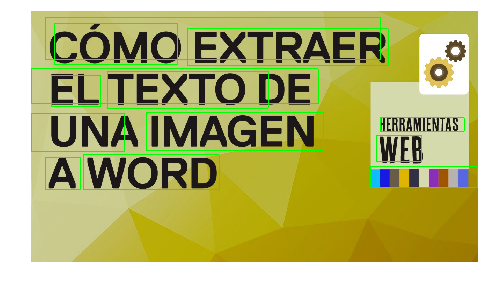

From this crop:


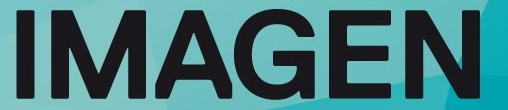

Characters found:


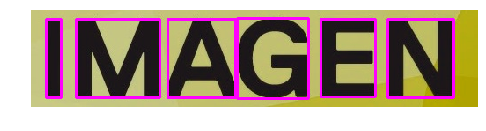

From this crop:


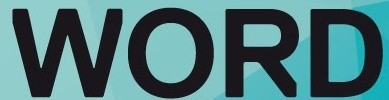

Characters found:


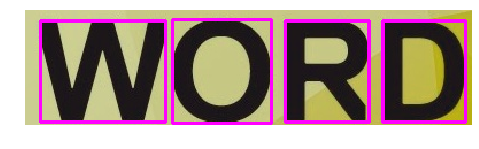

From this crop:


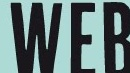

Characters found:


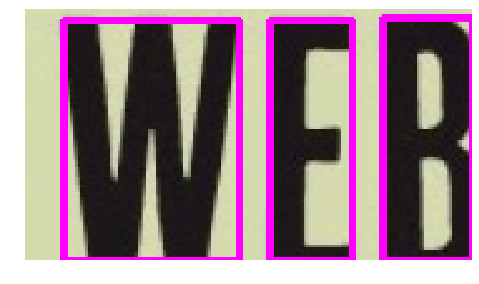

From this crop:


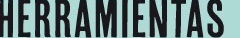

Characters found:


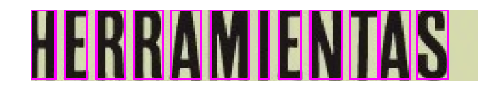

From this crop:


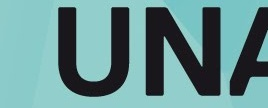

Characters found:


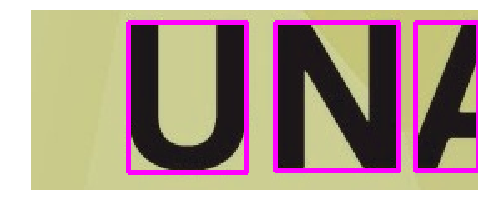

From this crop:


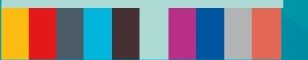

Characters found:


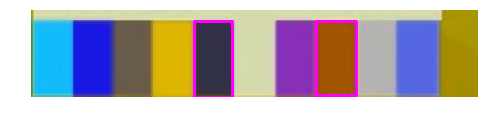

From this crop:


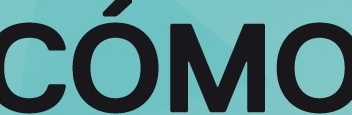

Characters found:


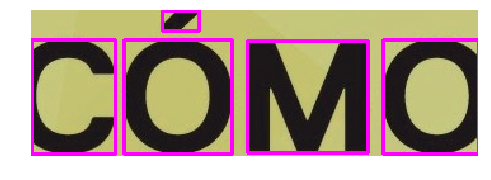

From this crop:


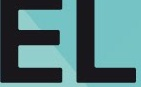

Characters found:


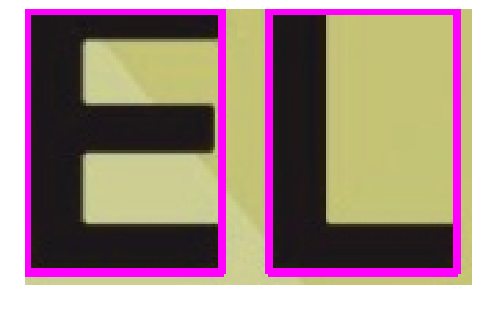

From this crop:


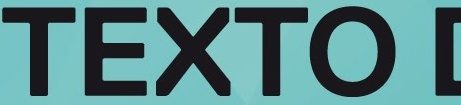

Characters found:


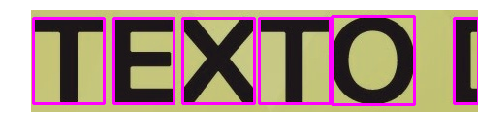

From this crop:


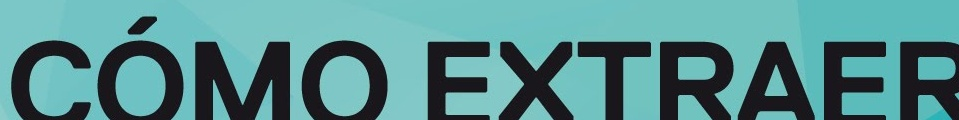

Characters found:


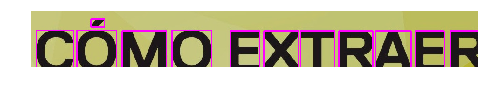

From this crop:


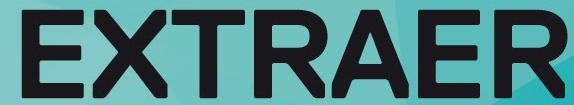

Characters found:


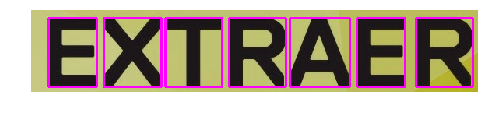

From this crop:


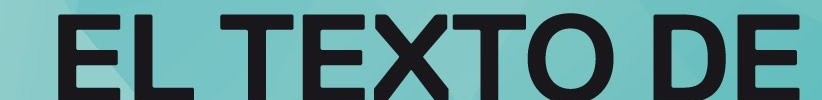

Characters found:


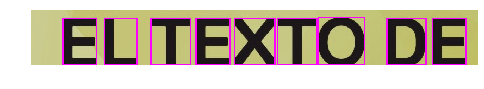

From this crop:


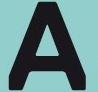

Characters found:


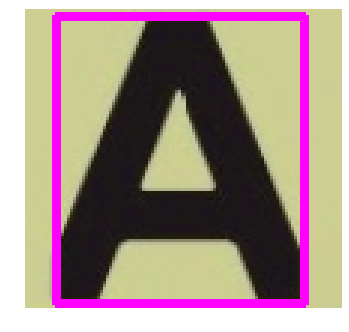

In [10]:
file_name = 'text-detector-ocr/Resources/test images/5.jpg'
n_crops = textdetector(file_name)

from IPython.display import Image
for i in range(n_crops):
  print('From this crop:')
  found_text = 'cropped/' + file_name[:-4] +'/' + str(i) + '.jpg'
  display(Image(found_text))
  get_chars(found_text)

Characters found:


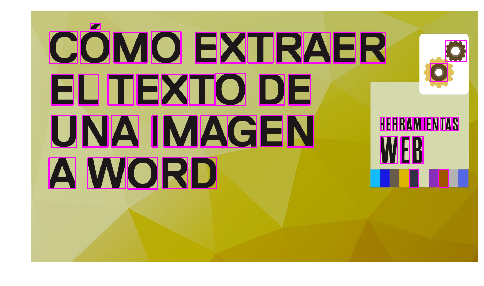

In [11]:
# Sometimes, get_chars function works better alone
get_chars(file_name)